In [48]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
#data = pd.read_csv("CASP.csv")
#target = np.array(data["RMSD"])
#data = data.drop(columns="RMSD")

In [3]:
#data = PolynomialFeatures(degree=2).fit_transform(data)

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(data,target,random_state=42)

In [5]:
#def scaler(X_train,X_test):
#    """
#    #datayı scale eder
#    """
#    scaler = StandardScaler()
#    X_train = scaler.fit_transform(X_train)
#    X_test = scaler.transform(X_test)
#    return X_train, X_test
#
#X_train, X_test = scaler(X_train,X_test)

In [16]:
#def k_meanscluster(X_train,X_test,n_clusters):
#    """
#    veriyi kmeans kullanarak scale eder.
#
#    parametre
#    n_cluser : kmeans'in kaç cluster olacağını belirler:
#
#    return:
#    train_labels: train datası için cluster indexlerini verir ör: [0,1,1,1,1]
#    test_labels: test datası için cluster indexlerini verir ör: [0,0,1]
#    """
#    cluster = KMeans(n_clusters=n_clusters,random_state=42).fit(X_train)
#    train_labels = cluster.labels_
#    test_labels = cluster.predict(X_test)
#    return train_labels,test_labels
#
#def data_spliter(X_train, X_test, y_train, y_test,train_labels,test_labels,index):
#    """
#    verileri kümeleme indekslerine göre ayrır.
#
#    parametre:
#    X_train, X_test, y_train, y_test: datalar
#    train_labels: train datası için kümüleme sonuçları
#    test_labels: test datası için kümeleme sonuçları
#    index: train ve test labellerı içindeki hangi sınıfın filtreleceği
#
#    return:
#    X_train_loc,X_test_loc,y_train_loc,y_test_loc: datalar
#
#    örneğin:
#
#    input:
#        X_train:      [1, 2, 3, 4, 5]
#        y_train:      [6, 7, 8, 9, 10]
#        train_labels: [0, 0, 0, 1, 1]
#
#        X_test:       [11 , 12, 13]
#        y_test:       [14 , 15, 16]
#        test_labels:  [0  , 1 , 0]
#
#        index = 1
#
#    return:
#         X_train_loc: [4, 5]
#         y_train_loc: [0, 10]
#
#         X_test_loc:  [12]
#         y_test_loc:  [15]
#    """
#    train_index = np.where(train_labels==index)
#    test_index = np.where(test_labels==index)
#    X_train_loc = X_train[train_index]
#    y_train_loc = y_train[train_index]
#    X_test_loc = X_test[test_index]
#    y_test_loc = y_test[test_index]
#    return X_train_loc,X_test_loc,y_train_loc,y_test_loc

In [7]:
#def model_predict(X_train, X_test, y_train, y_test, parameters, model):
#    """
#    tahminleme yapmayı sağlar. gridsearch içinde kullanılacak model ve parametre input olarak verilir.
#
#    parametre:
#    X_train, X_test, y_train, y_test: datalar
#    model: hangi algoritmanın kullanılacağını seçilir örn. Lasso
#    parameters: gridsearchteki kullanılacak algortimanın parametreleri
#
#    return:
#    error: test üzerindeki toplam hata oranı (ortalaması değl)
#    mean_error: crossvalidasyonda en iyi modelin hata ortalaması
#    std: crossvalidasyonda en iyi modelin stdsi
#    len(y_test): clusterdaki toplam veri sayısı
#    error_values: hata miktarları (array tipinde)
#
#    """
#    grid= GridSearchCV(model, parameters, scoring="neg_mean_squared_error",cv=5,verbose=1,n_jobs=15)
#    grid.fit(X_train,y_train)
#    std = grid.cv_results_['std_test_score'][grid.best_index_]
#    mean_error = grid.cv_results_['mean_test_score'][grid.best_index_]
#    best_model = grid.best_estimator_
#    best_model.fit(X_train,y_train)
#    y_pred = best_model.predict(X_test)
#    error_values = (y_test-y_pred)
#    error = mean_squared_error(y_test,y_pred) * len(y_test)
#    return error, mean_error, std , len(y_test), error_values

In [46]:
#parameters = {'alpha':np.logspace(-4,1,50)}
#model = Lasso(tol=0.001)

#parameters = {"n_estimators":[100,500],
#              "learning_rate":np.logspace(-1,-0.3,5),
#              "max_depth":[-1,25,64],
#              "reg_lambda":[0,0.5,1,5]}
#model = LGBMRegressor()

#def cluster_predict(X_train, X_test, y_train, y_test, parameters, model, show_info = True, num_cluster=6):
#    output_dict = {}
#    for cluster in range(1,num_cluster):
#        train_labels,test_labels = k_meanscluster(X_train,X_test,n_clusters=cluster)
#        total_error = 0
#        index_output = {}
#        for index in range(0,cluster):
#            X_train_loc,X_test_loc,y_train_loc,y_test_loc = data_spliter(X_train, X_test, y_train, y_test,train_labels,test_labels,index=index)
#            X_train_loc, X_test_loc = scaler(X_train_loc,X_test_loc)
#            error, mean_error, std, sample_size , error_values = model_predict(X_train_loc,X_test_loc,y_train_loc,y_test_loc,parameters,model)
#            total_error += error
#            index_output["cluster_"+str(index+1)] = {"mean_error":mean_error,"std":std,"sample_size":sample_size,"error_values":error_values}
#        output_dict["cluster_"+str(cluster)] = {"mse":total_error / len(y_test), "test_labels":test_labels,
#                                         "inside_cluster":index_output}
#        if show_info == True:
#            print("cluster"+str(cluster))
#            print("mse", total_error / len(y_test))
#            print("*****")
#
#        return output_dict

In [47]:
#output_dict = cluster_predict(X_train, X_test, y_train, y_test, parameters, model, show_info = True, num_cluster=6)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
cluster1
mse 24.727380410996606
*****


/home/jupyter-gunes/.conda/envs/gise/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.294e+05, tolerance: 1.025e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/jupyter-gunes/.conda/envs/gise/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e+05, tolerance: 1.024e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/jupyter-gunes/.conda/envs/gise/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [50]:
"""lightgbm model sonucu çalıştırması uzun sürüyor diye json yaptım bakarsın"""

with open("outpu_json.json","r") as f:
    output_dict = json.load(f)
    output_dict = json.loads(output_dict)
for a in range (1,5):
    output_dict["cluster_"+str(a)]["test_labels"] = np.array(output_dict["cluster_"+str(a)]["test_labels"])
    for b in range(1,a+1):
        output_dict["cluster_"+str(a)]["inside_cluster"]["cluster_"+str(b)]["error_values"] = np.asarray(output_dict["cluster_"+str(a)]["inside_cluster"]["cluster_"+str(b)]["error_values"])

In [19]:
for key in output_dict.keys():
    display(pd.json_normalize(output_dict[key]).T)

,0
mse,13.27668
test_labels,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
inside_cluster.cluster_1.mean_error,-13.735044
inside_cluster.cluster_1.std,0.313724
inside_cluster.cluster_1.sample_size,11433
inside_cluster.cluster_1.error_values,"[4.8623243228368835, -1.7694976699790526, -2.4..."


,0
mse,12.879975
test_labels,"[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, ..."
inside_cluster.cluster_1.mean_error,-13.008531
inside_cluster.cluster_1.std,0.197096
inside_cluster.cluster_1.sample_size,8064
inside_cluster.cluster_1.error_values,"[3.483579171175922, -2.828952338748034, -0.241..."
inside_cluster.cluster_2.mean_error,-14.382128
inside_cluster.cluster_2.std,0.737687
inside_cluster.cluster_2.sample_size,3369
inside_cluster.cluster_2.error_values,"[-1.9557934742944565, -1.9185695837079315, -0...."


,0
mse,12.886492
test_labels,"[0, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, ..."
inside_cluster.cluster_1.mean_error,-12.152446
inside_cluster.cluster_1.std,0.300314
inside_cluster.cluster_1.sample_size,5625
inside_cluster.cluster_1.error_values,"[3.7089963622489552, -3.450128596062993, 0.370..."
inside_cluster.cluster_2.mean_error,-14.847218
inside_cluster.cluster_2.std,0.425503
inside_cluster.cluster_2.sample_size,3818
inside_cluster.cluster_2.error_values,"[-0.7827405922303408, 1.4964416850213387, -4.6..."


,0
mse,12.671123
test_labels,"[1, 2, 2, 0, 3, 0, 2, 2, 3, 1, 1, 0, 3, 3, 3, ..."
inside_cluster.cluster_1.mean_error,-14.322015
inside_cluster.cluster_1.std,0.536012
inside_cluster.cluster_1.sample_size,2472
inside_cluster.cluster_1.error_values,"[0.10212671508919424, -0.3714538401689276, -2...."
inside_cluster.cluster_2.mean_error,-14.501291
inside_cluster.cluster_2.std,0.374893
inside_cluster.cluster_2.sample_size,4191
inside_cluster.cluster_2.error_values,"[2.8248061165600795, -1.4989078405005485, 2.05..."


In [39]:
def dagilim_bak(output_dict, tur = "se", limit = None):
    """
    clusterların dağılımına bakar.

    parametre:
        tur:
            "se" = squarred error
            "ae" = absolute error
            diğer her şey: direkt error
        limit:
            plotların y limitii ayarlar, default None.

    """
    for i in range(1,5):
        f, ax = plt.subplots(1,i)
        f.set_figheight(15)
        f.set_figwidth(30)
        plt.suptitle(f"cluster {i}",fontsize=40)
        for j in range(1,i+1):
            hata_farki = output_dict["cluster_"+str(i)]["inside_cluster"]["cluster_"+str(j)]["error_values"]
            if tur == "se":
                hata_farki = hata_farki**2
            elif tur == "ae":
                hata_farki = np.abs(hata_farki)
            if i == 1:
                sns.histplot(data=hata_farki, kde=True)
                if limit != None:

                    ax.set_ylim([0,limit])
            else:
                sns.histplot(data=hata_farki, kde=True,ax=ax[j-1])
                if limit != None:
                    ax[j-1].set_ylim([0, limit])
                ax[j-1].set_title(f"incluster {j}",fontsize=30)
        plt.show()

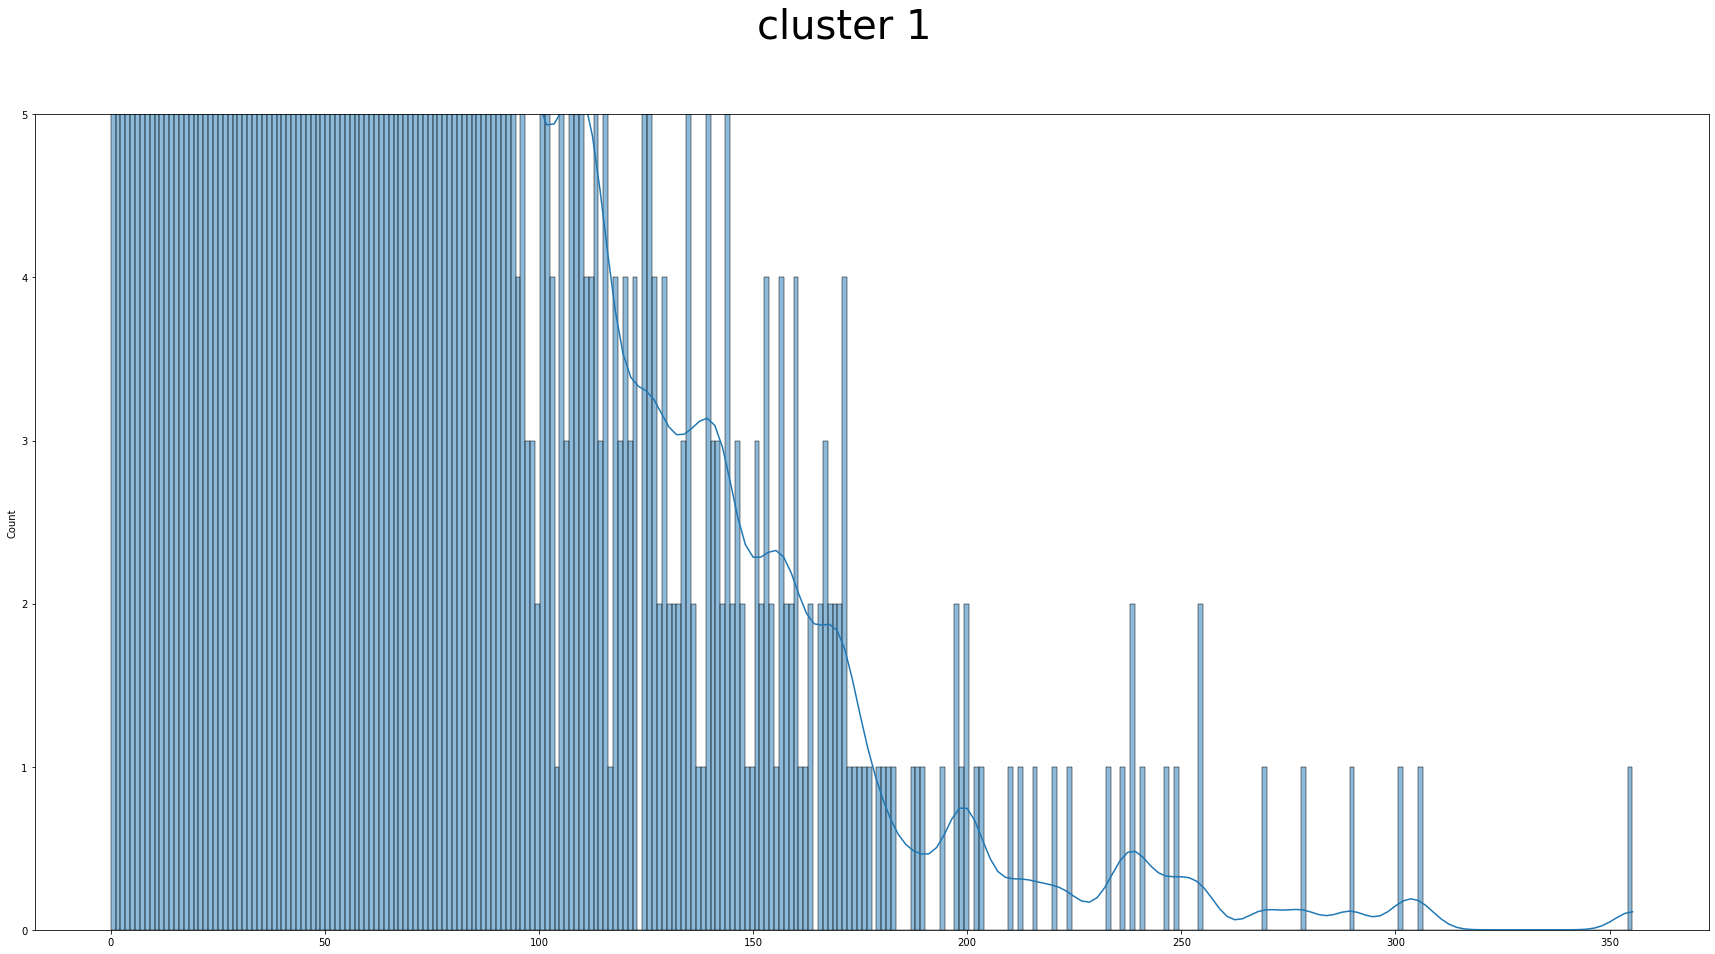

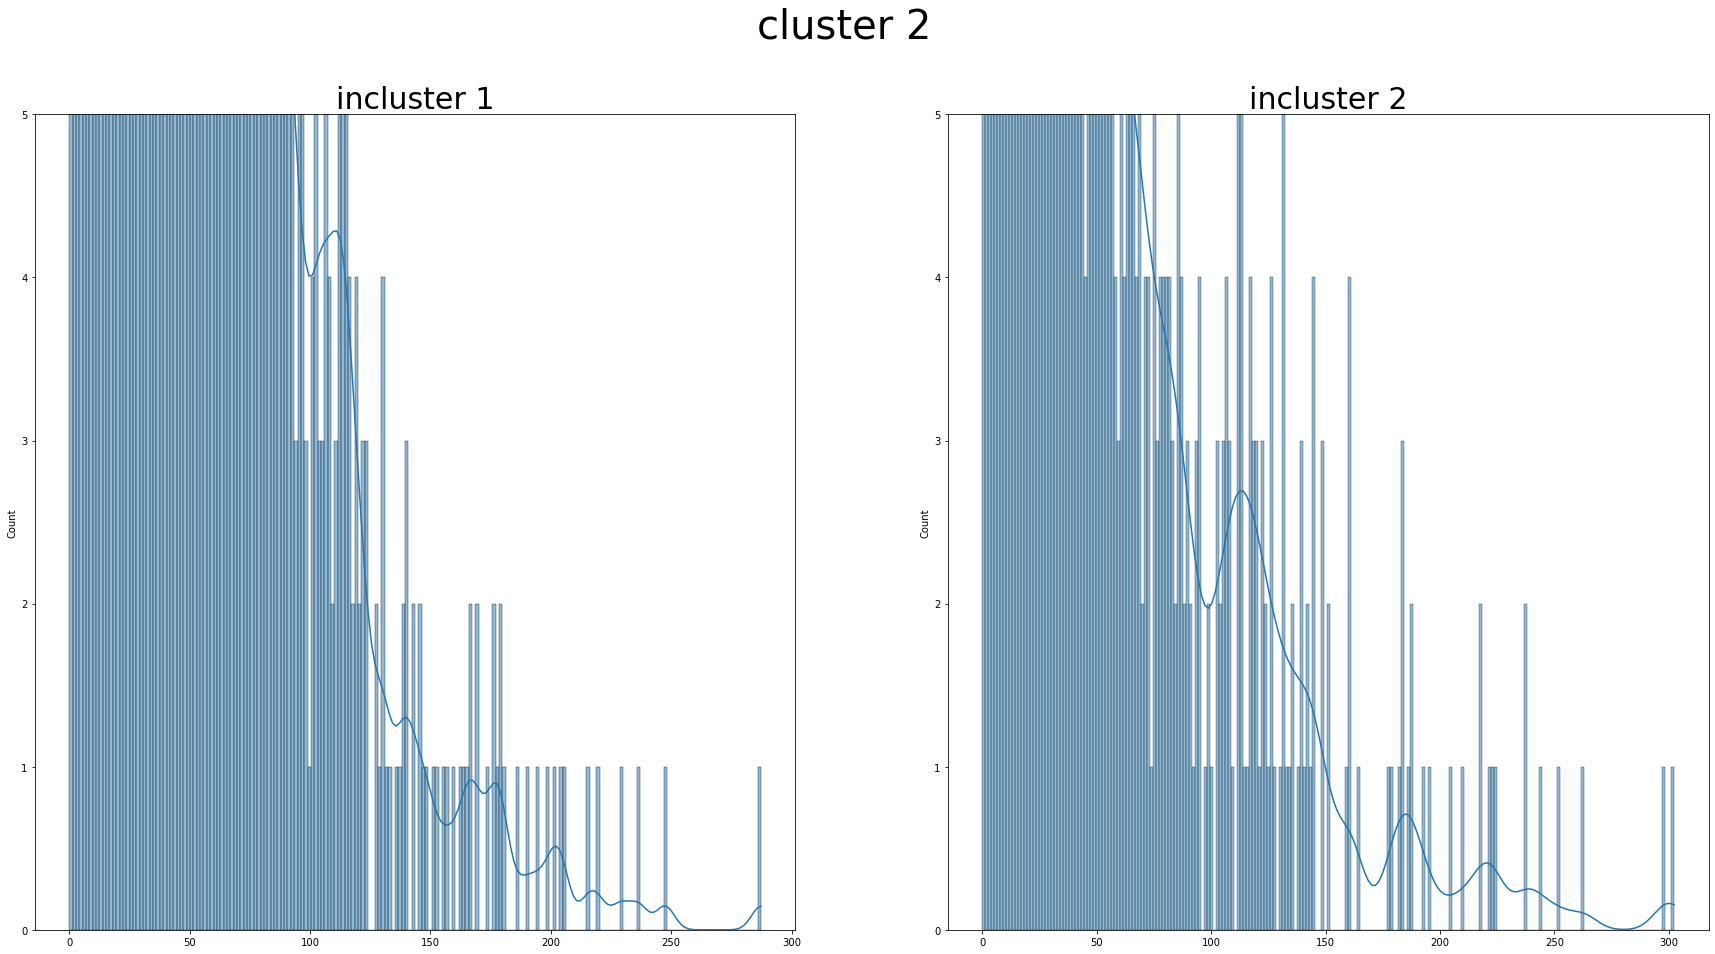

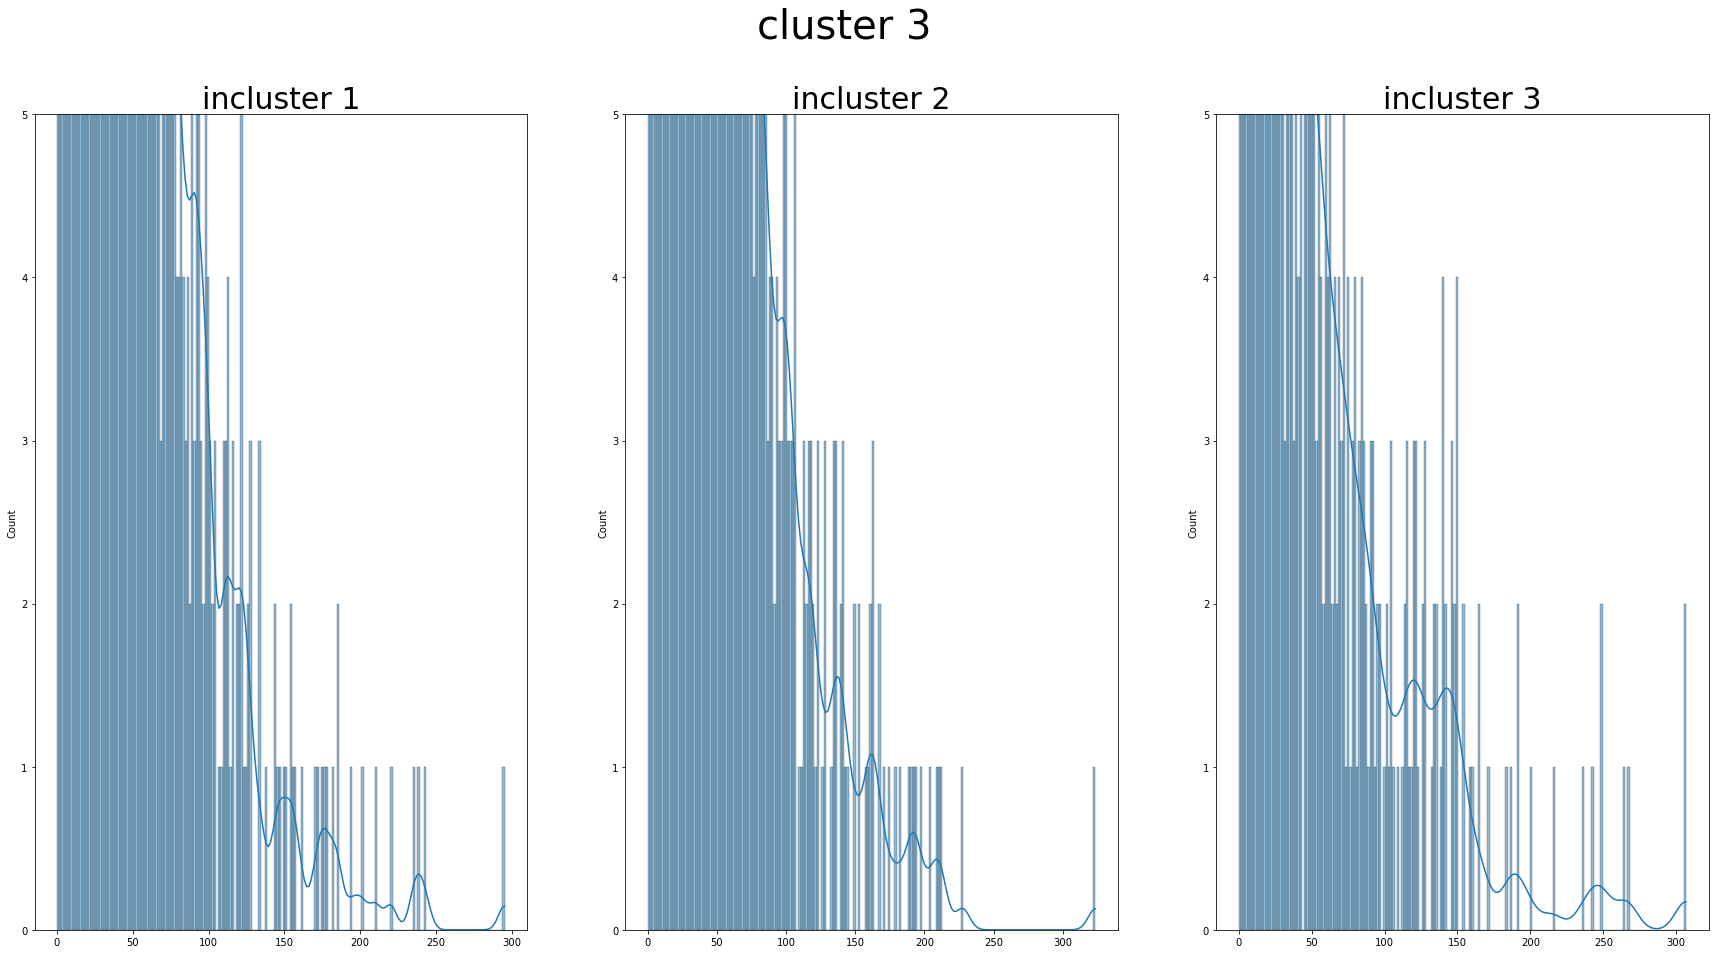

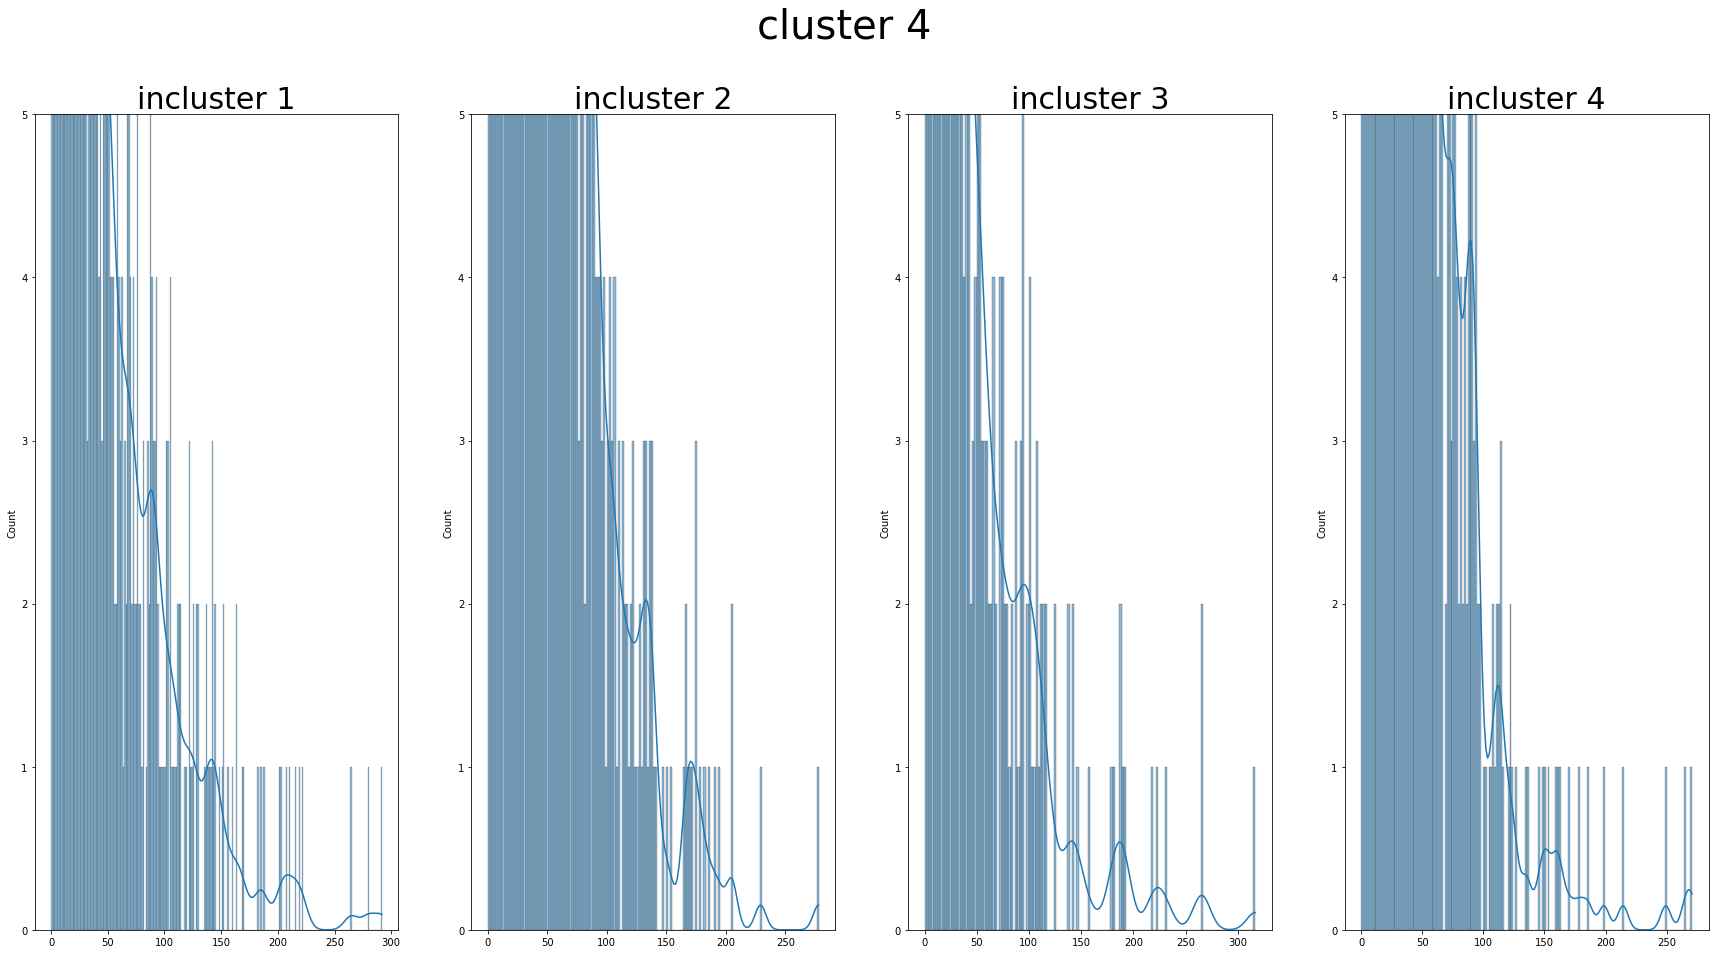

In [41]:
dagilim_bak(output_dict, tur = "se", limit=5)

In [11]:
#def find_difference(output_dict,cluster,index,plot=False):
#    """
#    baya önemli bir şey bence bugün yaptım
#
#    hiç cluster edilmemiş ile cluster edilmiş verileri, cluster bazında karşılaştırır.
#
#    """
#    one_cluster_error = output_dict["cluster_1"]["inside_cluster"]["cluster_1"]["error_values"]
#    current_cluster_error = output_dict[cluster]["inside_cluster"]["cluster_"+str(index)]["error_values"]
#    cluster_labels = output_dict[cluster]["test_labels"]
#    cluster_index = np.where(cluster_labels==index-1)
#    one_cluster_error_loc = one_cluster_error[cluster_index]
#    if plot == True:
#        f, ax = plt.subplots(1,2)
#        f.set_figheight(15)
#        f.set_figwidth(30)
#        sns.histplot(data = current_cluster_error,kde=True,ax=ax[0])
#        sns.histplot(data = one_cluster_error_loc, kde=True, ax=ax[1])
#        ax[0].set_title("CLUSTERED VERSION",fontsize=30)
#        ax[1].set_title("NON-CLUSTERED VERSION",fontsize=30)
#        plt.suptitle(cluster+" "+str(index),fontsize=30)
#        plt.show()
#    return one_cluster_error_loc, current_cluster_error

In [60]:
#cluster_compare = pd.DataFrame()
#
#for a in range (2,5):
#    for b in range(1,a+1):
#        empty_dict = {}
#        one_cluster_error, current_cluster_error = find_difference(output_dict,"cluster_"+str(a),b,plot=False)
#        empty_dict["cluster_num"] = a
#        empty_dict["incluster_name"] = b
#        empty_dict["shape"] = one_cluster_error.shape[0]
#        empty_dict["mse_non_clustered"]  = np.average(one_cluster_error**2)
#        empty_dict["mse_clustered"] =  np.average(current_cluster_error**2)
#        empty_dict["std_clustered"] =  np.std(current_cluster_error)
#        empty_dict["std_non_clustered"] =  np.std(one_cluster_error)
#        cluster_compare = cluster_compare.append(empty_dict,ignore_index=True)
#
#for _ in ["cluster_num","incluster_name","shape"]:
#    cluster_compare[_] = cluster_compare[_].astype(int)
#
#cluster_compare["mse_diff"] = cluster_compare["mse_non_clustered"] - cluster_compare["mse_clustered"]
#cluster_compare["std_diff"] = cluster_compare["std_non_clustered"] - cluster_compare["std_clustered"]

In [61]:
#cluster_compare

,cluster_num,incluster_name,shape,mse_non_clustered,mse_clustered,std_clustered,std_non_clustered,mse_diff,std_diff
0,2,1,8064,13.034162,12.707606,3.564673,3.610279,0.326557,0.045607
1,2,2,3369,13.857167,13.292556,3.644731,3.721477,0.564611,0.076746
2,3,1,5625,12.461323,12.138099,3.483975,3.530007,0.323224,0.046033
3,3,2,3818,13.960727,13.428794,3.664382,3.736333,0.531933,0.071951
4,3,3,1990,14.268987,13.961466,3.731938,3.772839,0.307520,0.040900
5,4,1,2472,13.304998,12.515272,3.535660,3.645576,0.789726,0.109916
6,4,2,4191,14.443557,13.413396,3.662250,3.800461,1.030161,0.138211
7,4,3,1079,14.193912,14.604012,3.820344,3.766983,-0.410101,-0.053361
8,4,4,3691,11.664630,11.367632,3.371508,3.415350,0.296998,0.043842
